# Zarr SODA 3.4.2 ds

In [35]:
from dask_gateway import GatewayCluster

cluster = GatewayCluster()
cluster.scale(20)
#cluster.adapt(minimum=2, maximum=10)  # or cluster.scale(n) to a fixed size.
client = cluster.get_client()

In [ ]:
client

In [198]:
client.close()
cluster.close()

In [3]:
import xarray as xr
from matplotlib import pyplot as plt
import gcsfs
import dask
import dask.array as dsa
import numpy as np
import fsspec
%matplotlib inline
xr.set_options(display_style='text');

In [4]:
url_ocean = 'gs://pangeo-forge-us-central1/pangeo-forge/soda/soda3.4.2_5dy_ocean_or'
url_transport = 'gs://pangeo-forge-us-central1/pangeo-forge/soda/soda3.4.2_10dy_transport_or'
#url_ice = 'gs://pangeo-forge-us-central1/pangeo-forge/soda/soda3.4.2_5dy_ice_or'

fs = gcsfs.GCSFileSystem()
ocean = xr.open_zarr(fs.get_mapper(url_ocean), consolidated=True)
transport = xr.open_zarr(fs.get_mapper(url_transport), consolidated=True)
#ice = xr.open_zarr(fs.get_mapper(url_ice), consolidated=True)

In [5]:
import zarr
zgroup = zarr.open_consolidated(fs.get_mapper(url_ocean))
zgroup.info

Name,/
Type,zarr.hierarchy.Group
Read-only,False
Store type,zarr.storage.ConsolidatedMetadataStore
Chunk store type,fsspec.mapping.FSMap
No. members,42
No. arrays,42
No. groups,0
Arrays,"anompb, average_DT, average_T1, average_T2, evap_heat, hflux_cpl, hflux_pme, hflux_total, lw_heat, mlp, mls, mlt, net_heating, nv, prho, salt, salt_flux_rstr, salt_flux_total, sbd, sbd_dhdt, sbd_horz, sbd_mld, sbd_vert, sens_heat, ssh, st_edges_ocean, st_ocean, sw_edges_ocean, sw_ocean, swflx, taux, tauy, temp, time, time_bounds, u, v, wt, xt_ocean, xu_ocean, yt_ocean, yu_ocean"


In [10]:
zgroup.time.size

1970

In [11]:
zgroup.time_bounds.size

3940

In [12]:
time_array = zgroup.time
time_array.info

Name,/time
Type,zarr.core.Array
Data type,int64
Shape,"(1970,)"
Chunk shape,"(1,)"
Order,C
Read-only,False
Compressor,"Blosc(cname='lz4', clevel=5, shuffle=SHUFFLE, blocksize=0)"
Store type,zarr.storage.ConsolidatedMetadataStore
Chunk store type,fsspec.mapping.FSMap
No. bytes,15760 (15.4K)


In [13]:
dict(time_array.attrs)

{'_ARRAY_DIMENSIONS': ['time'],
 'bounds': 'time_bounds',
 'calendar': 'julian',
 'calendar_type': 'JULIAN',
 'cartesian_axis': 'T',
 'long_name': 'time',
 'units': 'days since 1993-01-04 13:00:00.000000'}

In [199]:
ds = xr.open_zarr(fs.get_mapper(url_ocean), consolidated=True, decode_times=False)
ds

<xarray.Dataset>
Dimensions:          (nv: 2, st_edges_ocean: 51, st_ocean: 50, sw_edges_ocean: 51, sw_ocean: 50, time: 1970, xt_ocean: 1440, xu_ocean: 1440, yt_ocean: 1070, yu_ocean: 1070)
Coordinates:
  * nv               (nv) float64 1.0 2.0
  * st_edges_ocean   (st_edges_ocean) float64 0.0 10.07 ... 5.29e+03 5.5e+03
  * st_ocean         (st_ocean) float64 5.034 15.1 25.22 ... 5.185e+03 5.395e+03
  * sw_edges_ocean   (sw_edges_ocean) float64 5.034 15.1 ... 5.395e+03 5.5e+03
  * sw_ocean         (sw_ocean) float64 10.07 20.16 30.29 ... 5.29e+03 5.5e+03
  * time             (time) int64 0 5 10 15 20 25 ... 9825 9830 9835 9840 9845
  * xt_ocean         (xt_ocean) float64 -279.9 -279.6 -279.4 ... 79.62 79.88
  * xu_ocean         (xu_ocean) float64 -279.8 -279.5 -279.2 ... 79.5 79.75 80.0
  * yt_ocean         (yt_ocean) float64 -80.02 -79.92 -79.81 ... 89.84 89.95
  * yu_ocean         (yu_ocean) float64 -79.97 -79.86 -79.76 ... 89.89 90.0
Data variables:
    anompb           (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 1070, 1440), meta=np.ndarray>
    average_DT       (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
    average_T1       (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
    average_T2       (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
    evap_heat        (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 1070, 1440), meta=np.ndarray>
    hflux_cpl        (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 1070, 1440), meta=np.ndarray>
    hflux_pme        (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 1070, 1440), meta=np.ndarray>
    hflux_total      (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 1070, 1440), meta=np.ndarray>
    lw_heat          (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 1070, 1440), meta=np.ndarray>
    mlp              (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 1070, 1440), meta=np.ndarray>
    mls              (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 1070, 1440), meta=np.ndarray>
    mlt              (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 1070, 1440), meta=np.ndarray>
    net_heating      (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 1070, 1440), meta=np.ndarray>
    prho             (time, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 50, 1070, 1440), meta=np.ndarray>
    salt             (time, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 50, 1070, 1440), meta=np.ndarray>
    salt_flux_rstr   (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 1070, 1440), meta=np.ndarray>
    salt_flux_total  (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 1070, 1440), meta=np.ndarray>
    sbd              (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 1070, 1440), meta=np.ndarray>
    sbd_dhdt         (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 1070, 1440), meta=np.ndarray>
    sbd_horz         (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 1070, 1440), meta=np.ndarray>
    sbd_mld          (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 1070, 1440), meta=np.ndarray>
    sbd_vert         (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 1070, 1440), meta=np.ndarray>
    sens_heat        (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 1070, 1440), meta=np.ndarray>
    ssh              (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 1070, 1440), meta=np.ndarray>
    swflx            (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 1070, 1440), meta=np.ndarray>
    taux             (time, yu_ocean, xu_ocean) float32 dask.array<chunksize=(1, 1070, 1440), meta=np.ndarray>
    tauy             (time, yu_ocean, xu_ocean) float32 dask.array<chunksize=(1, 1070, 1440), meta=np.ndarray>
    temp             (time, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 50, 1070, 1440),

In [200]:
ds_dec = xr.open_zarr(fs.get_mapper(url_ocean), consolidated=True, decode_times=True)

In [106]:
ds.time.isel(time=1893)

<xarray.DataArray 'time' ()>
array(9465)
Coordinates:
    time     int64 9465
Attributes:
    bounds:          time_bounds
    calendar:        julian
    calendar_type:   JULIAN
    cartesian_axis:  T
    long_name:       time
    units:           days since 1993-01-04 13:00:00.000000

In [105]:
ds.time.isel(time=1894)

<xarray.DataArray 'time' ()>
array(9470)
Coordinates:
    time     int64 9470
Attributes:
    bounds:          time_bounds
    calendar:        julian
    calendar_type:   JULIAN
    cartesian_axis:  T
    long_name:       time
    units:           days since 1993-01-04 13:00:00.000000

In [102]:
ds.time.isel(time=1895)

<xarray.DataArray 'time' ()>
array(9475)
Coordinates:
    time     int64 9475
Attributes:
    bounds:          time_bounds
    calendar:        julian
    calendar_type:   JULIAN
    cartesian_axis:  T
    long_name:       time
    units:           days since 1993-01-04 13:00:00.000000

In [108]:
#encoded time
#this index should have value of 9480
ds.time.isel(time=1896).values = 9480

In [110]:
#this index should have value of 9485
ds.time.isel(time=1897).values = 9485

In [201]:
ds['time'][1896] = 9480

TypeError: IndexVariable values cannot be modified

In [154]:
#ds.time.data[-1] + 5 to get stop value
data = np.arange(0, 9850, 5)
data

array([   0,    5,   10, ..., 9835, 9840, 9845])

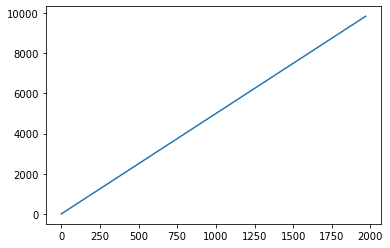

In [190]:
plt.plot(data)

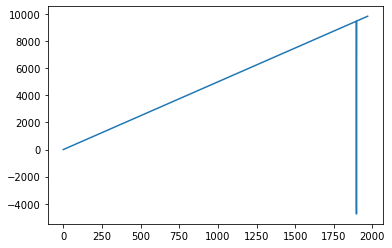

In [202]:
plt.plot(ds.time.data)

In [203]:
ds.time.data

array([   0,    5,   10, ..., 9835, 9840, 9845])

In [193]:
data

array([   0,    5,   10, ..., 9835, 9840, 9845])

In [207]:
ds.time

<xarray.DataArray 'time' (time: 1970)>
array([   0,    5,   10, ..., 9835, 9840, 9845])
Coordinates:
  * time     (time) int64 0 5 10 15 20 25 30 ... 9820 9825 9830 9835 9840 9845
Attributes:
    bounds:          time_bounds
    calendar:        julian
    calendar_type:   JULIAN
    cartesian_axis:  T
    long_name:       time
    units:           days since 1993-01-04 13:00:00.000000

In [221]:
time_copy = ds.time.copy(deep=False)#data=data)
time_new_data_coord = time_copy.assign_coords(time=data)

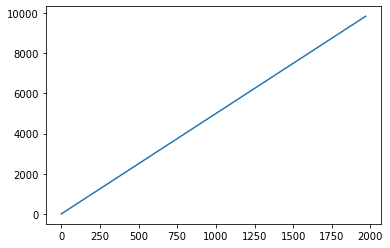

In [222]:
plt.plot(time_new_data_coord.time.values)

In [223]:
time_new_data_coord

<xarray.DataArray 'time' (time: 1970)>
array([   0,    5,   10, ..., 9835, 9840, 9845])
Coordinates:
  * time     (time) int64 0 5 10 15 20 25 30 ... 9820 9825 9830 9835 9840 9845
Attributes:
    bounds:          time_bounds
    calendar:        julian
    calendar_type:   JULIAN
    cartesian_axis:  T
    long_name:       time
    units:           days since 1993-01-04 13:00:00.000000

In [237]:
ds.time

<xarray.DataArray 'time' (time: 1970)>
array([   0,    5,   10, ..., 9835, 9840, 9845])
Coordinates:
  * time          (time) int64 0 5 10 15 20 25 ... 9820 9825 9830 9835 9840 9845
    time_cleaned  (time) float64 0.0 5.0 10.0 ... 9.835e+03 9.84e+03 9.845e+03

In [247]:
time_new = time_new_data_coord.to_dataset(name='time_new')

In [248]:
time_new

<xarray.Dataset>
Dimensions:   (time: 1970)
Coordinates:
  * time      (time) int64 0 5 10 15 20 25 30 ... 9820 9825 9830 9835 9840 9845
Data variables:
    time_new  (time) int64 0 5 10 15 20 25 30 ... 9820 9825 9830 9835 9840 9845

In [250]:
time_new['time_new'].time

<xarray.DataArray 'time' (time: 1970)>
array([   0,    5,   10, ..., 9835, 9840, 9845])
Coordinates:
  * time     (time) int64 0 5 10 15 20 25 30 ... 9820 9825 9830 9835 9840 9845

In [260]:
xr.decode_cf(time_new[['time_new']], decode_times=True, use_cftime=True).time

<xarray.DataArray 'time' (time: 1970)>
array([   0,    5,   10, ..., 9835, 9840, 9845])
Coordinates:
  * time     (time) int64 0 5 10 15 20 25 30 ... 9820 9825 9830 9835 9840 9845

In [224]:
ds.coords['time_cleaned'] = time_new_data_coord

In [233]:
ds

<xarray.Dataset>
Dimensions:          (nv: 2, st_edges_ocean: 51, st_ocean: 50, sw_edges_ocean: 51, sw_ocean: 50, time: 1970, xt_ocean: 1440, xu_ocean: 1440, yt_ocean: 1070, yu_ocean: 1070)
Coordinates:
  * nv               (nv) float64 1.0 2.0
  * st_edges_ocean   (st_edges_ocean) float64 0.0 10.07 ... 5.29e+03 5.5e+03
  * st_ocean         (st_ocean) float64 5.034 15.1 25.22 ... 5.185e+03 5.395e+03
  * sw_edges_ocean   (sw_edges_ocean) float64 5.034 15.1 ... 5.395e+03 5.5e+03
  * sw_ocean         (sw_ocean) float64 10.07 20.16 30.29 ... 5.29e+03 5.5e+03
  * time             (time) int64 0 5 10 15 20 25 ... 9825 9830 9835 9840 9845
  * xt_ocean         (xt_ocean) float64 -279.9 -279.6 -279.4 ... 79.62 79.88
  * xu_ocean         (xu_ocean) float64 -279.8 -279.5 -279.2 ... 79.5 79.75 80.0
  * yt_ocean         (yt_ocean) float64 -80.02 -79.92 -79.81 ... 89.84 89.95
  * yu_ocean         (yu_ocean) float64 -79.97 -79.86 -79.76 ... 89.89 90.0
    time_cleaned     (time) float64 0.0 5.0 10.0 ... 9.84e+03 9.845e+03
Data variables:
    anompb           (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 1070, 1440), meta=np.ndarray>
    average_DT       (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
    average_T1       (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
    average_T2       (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
    evap_heat        (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 1070, 1440), meta=np.ndarray>
    hflux_cpl        (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 1070, 1440), meta=np.ndarray>
    hflux_pme        (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 1070, 1440), meta=np.ndarray>
    hflux_total      (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 1070, 1440), meta=np.ndarray>
    lw_heat          (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 1070, 1440), meta=np.ndarray>
    mlp              (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 1070, 1440), meta=np.ndarray>
    mls              (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 1070, 1440), meta=np.ndarray>
    mlt              (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 1070, 1440), meta=np.ndarray>
    net_heating      (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 1070, 1440), meta=np.ndarray>
    prho             (time, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 50, 1070, 1440), meta=np.ndarray>
    salt             (time, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 50, 1070, 1440), meta=np.ndarray>
    salt_flux_rstr   (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 1070, 1440), meta=np.ndarray>
    salt_flux_total  (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 1070, 1440), meta=np.ndarray>
    sbd              (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 1070, 1440), meta=np.ndarray>
    sbd_dhdt         (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 1070, 1440), meta=np.ndarray>
    sbd_horz         (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 1070, 1440), meta=np.ndarray>
    sbd_mld          (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 1070, 1440), meta=np.ndarray>
    sbd_vert         (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 1070, 1440), meta=np.ndarray>
    sens_heat        (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 1070, 1440), meta=np.ndarray>
    ssh              (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 1070, 1440), meta=np.ndarray>
    swflx            (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 1070, 1440), meta=np.ndarray>
    taux             (time, yu_ocean, xu_ocean) float32 dask.array<chunksize=(1, 1070, 1440), meta=np.ndarray>
    tauy             (time, yu_ocean, xu_ocean) float32 dask.array<chunksize=(1, 1070, 1440), meta=np.ndarray>
    temp             (time, st_ocea

In [226]:
ds.time_cleaned

<xarray.DataArray 'time_cleaned' (time: 1970)>
array([0.000e+00, 5.000e+00, 1.000e+01, ..., 9.835e+03, 9.840e+03, 9.845e+03])
Coordinates:
  * time          (time) int64 0 5 10 15 20 25 ... 9820 9825 9830 9835 9840 9845
    time_cleaned  (time) float64 0.0 5.0 10.0 ... 9.835e+03 9.84e+03 9.845e+03
Attributes:
    bounds:          time_bounds
    calendar:        julian
    calendar_type:   JULIAN
    cartesian_axis:  T
    long_name:       time
    units:           days since 1993-01-04 13:00:00.000000

In [234]:
time = xr.decode_cf(ds[['time_cleaned']]).time

In [19]:
xr.decode_cf(ds[['time']]).time

<xarray.DataArray 'time' (time: 1970)>
array([cftime.DatetimeJulian(1993, 1, 4, 13, 0, 0, 0),
       cftime.DatetimeJulian(1993, 1, 9, 13, 0, 0, 0),
       cftime.DatetimeJulian(1993, 1, 14, 13, 0, 0, 0), ...,
       cftime.DatetimeJulian(2019, 12, 9, 13, 0, 0, 0),
       cftime.DatetimeJulian(2019, 12, 14, 13, 0, 0, 0),
       cftime.DatetimeJulian(2019, 12, 19, 13, 0, 0, 0)], dtype=object)
Coordinates:
  * time     (time) object 1993-01-04 13:00:00 ... 2019-12-19 13:00:00
Attributes:
    bounds:          time_bounds
    calendar_type:   JULIAN
    cartesian_axis:  T
    long_name:       time

In [33]:
correct_time = np.arange(0, len(ds.time))

In [34]:
correct_time

array([   0,    1,    2, ..., 1967, 1968, 1969])

In [32]:
xr.decode_cf(correct_time)

TypeError: can only decode Dataset or DataStore objects

In [112]:
correct_time = np.arange(0, len(ds.time))
ds['time'].data = correct_time
ds_fixed = xr.decode_cf(ds)
ds_fixed

ValueError: Cannot assign to the .data attribute of dimension coordinate a.k.a IndexVariable 'time'. Please use DataArray.assign_coords, Dataset.assign_coords or Dataset.assign as appropriate.

In [37]:
import xgcm

grid_ocean = xgcm.Grid(ocean, coords={'X': {'center': 'xt_ocean', 'right': 'xu_ocean'}, 
                                      'Y': {'center': 'yt_ocean', 'right': 'yu_ocean'},
                                      'T': {'center': 'time'},
                                      'Z': {'center': 'st_edges_ocean', 'right': 'st_ocean'},
                                      'Zu': {'center': 'sw_edges_ocean', 'right': 'sw_ocean'}},
                     periodic=['X'])
grid_ocean

<xgcm.Grid>
X Axis (periodic, boundary=None):
  * center   xt_ocean --> right
  * right    xu_ocean --> center
Y Axis (not periodic, boundary=None):
  * center   yt_ocean --> right
  * right    yu_ocean --> center
T Axis (not periodic, boundary=None):
  * center   time
Z Axis (not periodic, boundary=None):
  * center   st_edges_ocean --> right
  * right    st_ocean --> center
Zu Axis (not periodic, boundary=None):
  * center   sw_edges_ocean --> right
  * right    sw_ocean --> center

In [38]:
grid_transport = xgcm.Grid(transport, coords={'X': {'center': 'xt_ocean', 'right': 'xu_ocean'}, 
                                              'Y': {'center': 'yt_ocean', 'right': 'yu_ocean'},
                                              'T': {'center': 'time'},
                                              'Z': {'center': 'st_edges_ocean', 'right': 'st_ocean'},
                                              'Zu': {'center': 'sw_edges_ocean', 'right': 'sw_ocean'}},
                     periodic=['X'])
grid_transport

<xgcm.Grid>
X Axis (periodic, boundary=None):
  * center   xt_ocean --> right
  * right    xu_ocean --> center
Y Axis (not periodic, boundary=None):
  * center   yt_ocean --> right
  * right    yu_ocean --> center
T Axis (not periodic, boundary=None):
  * center   time
Z Axis (not periodic, boundary=None):
  * center   st_edges_ocean --> right
  * right    st_ocean --> center
Zu Axis (not periodic, boundary=None):
  * center   sw_edges_ocean --> right
  * right    sw_ocean --> center

## Variables to create:

- [ ] Vel terms for psi
- [ ] Surf flux term (incl. sw penetration)
- [ ] Total tendency term

## <font color='Green'>Get cell area and volume in meters</font>

In [39]:
#calculating meters per latitudinal & longitudinal degree
earth_radius = 6.371e6
earth_circumference = 2*np.pi*earth_radius
meters_per_degree = earth_circumference / 360
meters_per_degree

111194.92664455873

In [40]:
#converting lat from degrees to meters
delta_lat = grid_ocean.diff(ocean.yt_ocean, 'Y', boundary='fill', fill_value=np.nan)
dy = delta_lat * meters_per_degree
delta_lat_u = grid_ocean.diff(ocean.yu_ocean, 'Y', boundary='fill', fill_value=np.nan)
dy_u = delta_lat_u * meters_per_degree

#converting degrees lon to lon [meters] (pinching at the poles)
delta_lon = grid_ocean.diff(ocean.xt_ocean, 'X', boundary_discontinuity=360)
dx = delta_lon * meters_per_degree * np.cos(np.deg2rad(ocean.yt_ocean))
delta_lon_u = grid_ocean.diff(ocean.xu_ocean, 'X', boundary_discontinuity=360)
dx_u = delta_lon_u * meters_per_degree * np.cos(np.deg2rad(ocean.yu_ocean))

In [41]:
dx

<xarray.DataArray (xu_ocean: 1440, yt_ocean: 1070)>
array([[4817.15765359, 4867.60859943, 4918.04301095, ...,  128.04559522,
          76.81169061,   25.57752508],
       [4817.15765359, 4867.60859943, 4918.04301095, ...,  128.04559522,
          76.81169061,   25.57752508],
       [4817.15765359, 4867.60859943, 4918.04301095, ...,  128.04559522,
          76.81169061,   25.57752508],
       ...,
       [4817.15765359, 4867.60859943, 4918.04301095, ...,  128.04559522,
          76.81169061,   25.57752508],
       [4817.15765359, 4867.60859943, 4918.04301095, ...,  128.04559522,
          76.81169061,   25.57752508],
       [4817.15765359, 4867.60859943, 4918.04301095, ...,  128.04559522,
          76.81169061,   25.57752508]])
Coordinates:
  * xu_ocean  (xu_ocean) float64 -279.8 -279.5 -279.2 -279.0 ... 79.5 79.75 80.0
  * yt_ocean  (yt_ocean) float64 -80.02 -79.92 -79.81 ... 89.74 89.84 89.95

In [42]:
dx_u

<xarray.DataArray (xt_ocean: 1440, yu_ocean: 1070)>
array([[4.84238518e+03, 4.89282788e+03, 4.94325396e+03, ...,
        1.02428686e+02, 5.11946296e+01, 1.70218139e-12],
       [4.84238518e+03, 4.89282788e+03, 4.94325396e+03, ...,
        1.02428686e+02, 5.11946296e+01, 1.70218139e-12],
       [4.84238518e+03, 4.89282788e+03, 4.94325396e+03, ...,
        1.02428686e+02, 5.11946296e+01, 1.70218139e-12],
       ...,
       [4.84238518e+03, 4.89282788e+03, 4.94325396e+03, ...,
        1.02428686e+02, 5.11946296e+01, 1.70218139e-12],
       [4.84238518e+03, 4.89282788e+03, 4.94325396e+03, ...,
        1.02428686e+02, 5.11946296e+01, 1.70218139e-12],
       [4.84238518e+03, 4.89282788e+03, 4.94325396e+03, ...,
        1.02428686e+02, 5.11946296e+01, 1.70218139e-12]])
Coordinates:
  * xt_ocean  (xt_ocean) float64 -279.9 -279.6 -279.4 ... 79.38 79.62 79.88
  * yu_ocean  (yu_ocean) float64 -79.97 -79.86 -79.76 ... 89.79 89.89 90.0

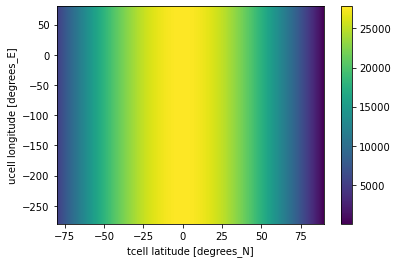

In [43]:
dx.plot()

In [44]:
dz = grid_ocean.diff(ocean.st_edges_ocean[1:], 'Z', boundary='fill', fill_value=0.)
dz_u = grid_ocean.diff(ocean.sw_edges_ocean[1:], 'Zu', boundary='fill', fill_value=0.)

In [45]:
cell_elements = xr.merge([dx.rename('dx'), dx_u.rename('dx_u'), 
                          dy.rename('dy'), dy_u.rename('dy_u'), 
                          dz.rename('dz'), dz_u.rename('dz_u')])

In [46]:
cell_elements

<xarray.Dataset>
Dimensions:   (st_ocean: 50, sw_ocean: 50, xt_ocean: 1440, xu_ocean: 1440, yt_ocean: 1070, yu_ocean: 1070)
Coordinates:
  * xu_ocean  (xu_ocean) float64 -279.8 -279.5 -279.2 -279.0 ... 79.5 79.75 80.0
  * yt_ocean  (yt_ocean) float64 -80.02 -79.92 -79.81 ... 89.74 89.84 89.95
  * xt_ocean  (xt_ocean) float64 -279.9 -279.6 -279.4 ... 79.38 79.62 79.88
  * yu_ocean  (yu_ocean) float64 -79.97 -79.86 -79.76 ... 89.79 89.89 90.0
  * st_ocean  (st_ocean) float64 5.034 15.1 25.22 ... 5.185e+03 5.395e+03
  * sw_ocean  (sw_ocean) float64 10.07 20.16 30.29 ... 5.08e+03 5.29e+03 5.5e+03
Data variables:
    dx        (xu_ocean, yt_ocean) float64 4.817e+03 4.868e+03 ... 76.81 25.58
    dx_u      (xt_ocean, yu_ocean) float64 4.842e+03 4.893e+03 ... 1.702e-12
    dy        (yu_ocean) float64 1.174e+04 1.174e+04 1.174e+04 ... 1.174e+04 nan
    dy_u      (yt_ocean) float64 nan 1.174e+04 1.174e+04 ... 1.174e+04 1.173e+04
    dz        (st_ocean) float64 10.09 10.13 10.18 ... 209.9 209.9 -5.5e+03
    dz_u      (sw_ocean) float64 10.12 10.14 10.22 ... 209.9 105.0 -5.5e+03

## <font color='Green'>Slice to WG region</font>

In [47]:
#WG boundaries (80˚S, 62˚S, 65˚W, 30˚E)
lower_lat = 0 #-80.02101494
upper_lat = 169 #-62.01972704
left_lon =  859 #-65.12
right_lon = 1240 #30.12

lower_lat_u = 0 #-79.96821565
upper_lat_u = 169 #-61.96096874 python is right exclusive so will have -62.0 in array
left_lon_u = 859 #-65.0
right_lon_u = 1240 #30.25 python is right exclusive so will have 30.0˚E

In [48]:
#set the boundaries
lat_range = dict(yt_ocean=slice(lower_lat, upper_lat), yu_ocean=slice(lower_lat_u, upper_lat_u))
lon_range = dict(xt_ocean=slice(left_lon, right_lon), xu_ocean=slice(left_lon_u, right_lon_u))

lat_range_no_u = dict(yt_ocean=slice(lower_lat, upper_lat))
lon_range_no_u = dict(xt_ocean=slice(left_lon, right_lon))

lat_range_u = dict(yu_ocean=slice(lower_lat_u, upper_lat_u))
lon_range_u = dict(xu_ocean=slice(left_lon_u, right_lon_u))

In [49]:
ocean_wg = ocean.isel(**lat_range, **lon_range)
transport_wg = transport.isel(**lat_range, **lon_range)
cells_wg = cell_elements.isel(**lat_range, **lon_range)

In [50]:
import xgcm

grid_ocean_wg = xgcm.Grid(ocean_wg, coords={'X': {'center': 'xt_ocean', 'right': 'xu_ocean'}, 
                                      'Y': {'center': 'yt_ocean', 'right': 'yu_ocean'},
                                      'T': {'center': 'time'},
                                      'Z': {'center': 'st_edges_ocean', 'right': 'st_ocean'},
                                      'Zu': {'center': 'sw_edges_ocean', 'right': 'sw_ocean'}},
                     periodic=['X'])
grid_ocean_wg

<xgcm.Grid>
X Axis (periodic, boundary=None):
  * center   xt_ocean --> right
  * right    xu_ocean --> center
Y Axis (not periodic, boundary=None):
  * center   yt_ocean --> right
  * right    yu_ocean --> center
T Axis (not periodic, boundary=None):
  * center   time
Z Axis (not periodic, boundary=None):
  * center   st_edges_ocean --> right
  * right    st_ocean --> center
Zu Axis (not periodic, boundary=None):
  * center   sw_edges_ocean --> right
  * right    sw_ocean --> center

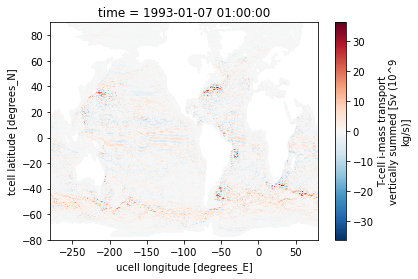

In [51]:
transport.tx_int[0].plot()

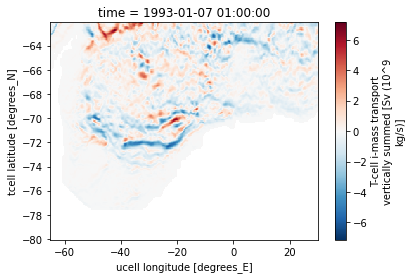

In [52]:
transport_wg.tx_int[0].plot()

## <font color='Green'>\begin{equation*} Transport/Vel\ terms \end{equation*}</font>

In [53]:
transport_wg.tx_trans.isel(xu_ocean=-1)

<xarray.DataArray 'tx_trans' (time: 985, st_ocean: 50, yt_ocean: 169)>
dask.array<getitem, shape=(985, 50, 169), dtype=float32, chunksize=(1, 50, 169), chunktype=numpy.ndarray>
Coordinates:
  * st_ocean  (st_ocean) float64 5.034 15.1 25.22 ... 5.185e+03 5.395e+03
  * time      (time) object 1993-01-07 01:00:00 ... 2019-12-17 01:00:00
    xu_ocean  float64 30.0
  * yt_ocean  (yt_ocean) float64 -80.02 -79.92 -79.81 ... -62.37 -62.25 -62.14
Attributes:
    cell_methods:   time: mean
    coordinates:    geolon_c geolat_t
    long_name:      T-cell i-mass transport
    standard_name:  ocean_x_mass_transport
    time_avg_info:  average_T1,average_T2,average_DT
    units:          Sv (10^9 kg/s)
    valid_range:    [-1.0000000200408773e+20, 1.0000000200408773e+20]

In [54]:
cells_wg.dz.coords

Coordinates:
  * st_ocean  (st_ocean) float64 5.034 15.1 25.22 ... 5.185e+03 5.395e+03

In [55]:
cells_wg.dy_u.coords

Coordinates:
  * yt_ocean  (yt_ocean) float64 -80.02 -79.92 -79.81 ... -62.37 -62.25 -62.14

In [56]:
transport_wg.ty_trans.coords

Coordinates:
  * st_ocean  (st_ocean) float64 5.034 15.1 25.22 ... 5.185e+03 5.395e+03
  * time      (time) object 1993-01-07 01:00:00 ... 2019-12-17 01:00:00
  * xt_ocean  (xt_ocean) float64 -65.12 -64.88 -64.62 ... 29.38 29.62 29.88
  * yu_ocean  (yu_ocean) float64 -79.97 -79.86 -79.76 ... -62.31 -62.2 -62.08

In [57]:
cells_wg.dx_u.coords

Coordinates:
  * xt_ocean  (xt_ocean) float64 -65.12 -64.88 -64.62 ... 29.38 29.62 29.88
  * yu_ocean  (yu_ocean) float64 -79.97 -79.86 -79.76 ... -62.31 -62.2 -62.08

In [58]:
u_transport_right = (transport_wg.tx_trans * cells_wg.dz * cells_wg.dy_u).isel(xu_ocean=-1)
u_transport_left = (transport_wg.tx_trans * cells_wg.dz * cells_wg.dy_u).isel(xu_ocean=0)

v_transport = (transport_wg.ty_trans * cells_wg.dz * cells_wg.dx_u).isel(yu_ocean=-1)

In [59]:
ocean_wg.wt[0].coords

Coordinates:
  * sw_ocean  (sw_ocean) float64 10.07 20.16 30.29 ... 5.08e+03 5.29e+03 5.5e+03
    time      object 1993-01-04 13:00:00
  * xt_ocean  (xt_ocean) float64 -65.12 -64.88 -64.62 ... 29.38 29.62 29.88
  * yt_ocean  (yt_ocean) float64 -80.02 -79.92 -79.81 ... -62.37 -62.25 -62.14

In [60]:
cells_wg.dy_u.coords

Coordinates:
  * yt_ocean  (yt_ocean) float64 -80.02 -79.92 -79.81 ... -62.37 -62.25 -62.14

In [61]:
dx_interp = grid_ocean_wg.interp(cells_wg.dx_u, 'Y', boundary='fill')

In [62]:
dx_interp.coords

Coordinates:
  * xt_ocean  (xt_ocean) float64 -65.12 -64.88 -64.62 ... 29.38 29.62 29.88
  * yt_ocean  (yt_ocean) float64 -80.02 -79.92 -79.81 ... -62.37 -62.25 -62.14

In [63]:
w_transport = (ocean_wg.wt * dx_interp * cells_wg.dy_u).isel(sw_ocean=0)

In [64]:
# constants
heat_capacity_cp = 3.994e3
runit2mass = 1.035e3 #rho

#surf_transport = (ocean_wg.net_heating * dx_interp * cells_wg.dy_u) / (heat_capacity_cp * runit2mass)
surf_transport = ocean_wg.net_heating  / (heat_capacity_cp * runit2mass)

In [65]:
u_transport_left[0]

<xarray.DataArray (st_ocean: 50, yt_ocean: 169)>
dask.array<getitem, shape=(50, 169), dtype=float64, chunksize=(50, 169), chunktype=numpy.ndarray>
Coordinates:
  * st_ocean  (st_ocean) float64 5.034 15.1 25.22 ... 5.185e+03 5.395e+03
    time      object 1993-01-07 01:00:00
    xu_ocean  float64 -65.0
  * yt_ocean  (yt_ocean) float64 -80.02 -79.92 -79.81 ... -62.37 -62.25 -62.14

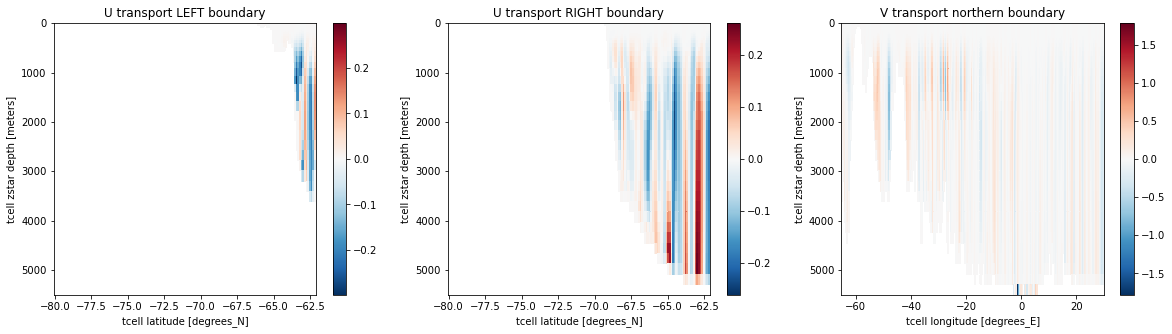

In [66]:
fig, (ax0,ax1,ax2) = plt.subplots(1,3, figsize=(20,5))

(u_transport_left[0]/1e6).plot(yincrease=False, ax=ax0)
ax0.set_title('U transport LEFT boundary')
(u_transport_right[0]/1e6).plot(yincrease=False, ax=ax1) 
ax1.set_title('U transport RIGHT boundary')
(v_transport[0]/1e6).plot(yincrease=False, ax=ax2)
ax2.set_title('V transport northern boundary');

In [67]:
client

Client Scheduler: gateway://traefik-gcp-uscentral1b-prod-dask-gateway.prod:80/prod.5d413cd8d3684b9081652505edb436d4 Dashboard: /services/dask-gateway/clusters/prod.5d413cd8d3684b9081652505edb436d4/status,Cluster Workers: 10 Cores: 20 Memory: 85.90 GB


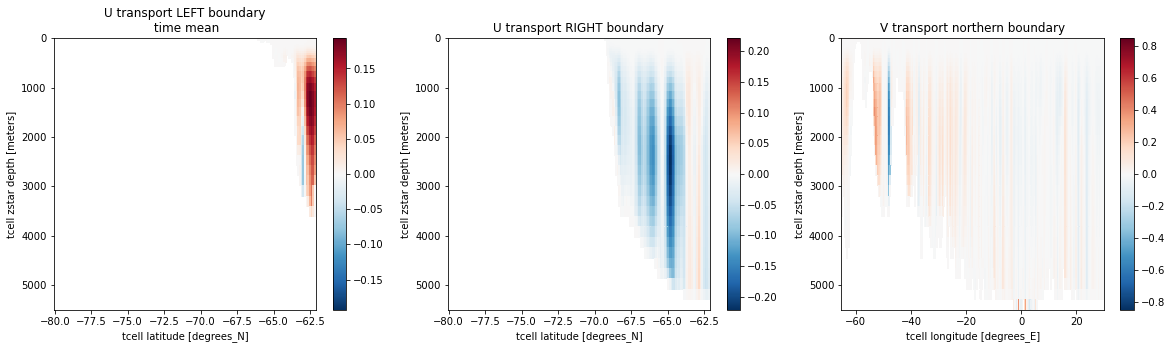

In [68]:
fig, (ax0,ax1,ax2) = plt.subplots(1,3, figsize=(20,5))

(u_transport_left.mean(dim='time')/1e6).plot(yincrease=False, ax=ax0)
ax0.set_title('U transport LEFT boundary\n time mean')
(u_transport_right.mean(dim='time')/1e6).plot(yincrease=False, ax=ax1) 
ax1.set_title('U transport RIGHT boundary')
(v_transport.mean(dim='time')/1e6).plot(yincrease=False, ax=ax2)
ax2.set_title('V transport northern boundary');

In [69]:
client.restart()

Client Scheduler: gateway://traefik-gcp-uscentral1b-prod-dask-gateway.prod:80/prod.5d413cd8d3684b9081652505edb436d4 Dashboard: /services/dask-gateway/clusters/prod.5d413cd8d3684b9081652505edb436d4/status,Cluster Workers: 20 Cores: 40 Memory: 171.80 GB


In [70]:
u_transport_right

<xarray.DataArray (time: 985, st_ocean: 50, yt_ocean: 169)>
dask.array<getitem, shape=(985, 50, 169), dtype=float64, chunksize=(1, 50, 169), chunktype=numpy.ndarray>
Coordinates:
  * st_ocean  (st_ocean) float64 5.034 15.1 25.22 ... 5.185e+03 5.395e+03
  * time      (time) object 1993-01-07 01:00:00 ... 2019-12-17 01:00:00
    xu_ocean  float64 30.0
  * yt_ocean  (yt_ocean) float64 -80.02 -79.92 -79.81 ... -62.37 -62.25 -62.14

In [71]:
u_transport_left

<xarray.DataArray (time: 985, st_ocean: 50, yt_ocean: 169)>
dask.array<getitem, shape=(985, 50, 169), dtype=float64, chunksize=(1, 50, 169), chunktype=numpy.ndarray>
Coordinates:
  * st_ocean  (st_ocean) float64 5.034 15.1 25.22 ... 5.185e+03 5.395e+03
  * time      (time) object 1993-01-07 01:00:00 ... 2019-12-17 01:00:00
    xu_ocean  float64 -65.0
  * yt_ocean  (yt_ocean) float64 -80.02 -79.92 -79.81 ... -62.37 -62.25 -62.14

In [72]:
v_transport

<xarray.DataArray (time: 985, st_ocean: 50, xt_ocean: 381)>
dask.array<getitem, shape=(985, 50, 381), dtype=float64, chunksize=(1, 50, 381), chunktype=numpy.ndarray>
Coordinates:
  * st_ocean  (st_ocean) float64 5.034 15.1 25.22 ... 5.185e+03 5.395e+03
  * time      (time) object 1993-01-07 01:00:00 ... 2019-12-17 01:00:00
  * xt_ocean  (xt_ocean) float64 -65.12 -64.88 -64.62 ... 29.38 29.62 29.88
    yu_ocean  float64 -62.08

In [73]:
w_transport

<xarray.DataArray (time: 1970, yt_ocean: 169, xt_ocean: 381)>
dask.array<getitem, shape=(1970, 169, 381), dtype=float64, chunksize=(1, 169, 381), chunktype=numpy.ndarray>
Coordinates:
    sw_ocean  float64 10.07
  * time      (time) object 1993-01-04 13:00:00 ... 2019-12-19 13:00:00
  * xt_ocean  (xt_ocean) float64 -65.12 -64.88 -64.62 ... 29.38 29.62 29.88
  * yt_ocean  (yt_ocean) float64 -80.02 -79.92 -79.81 ... -62.37 -62.25 -62.14

In [74]:
surf_transport

<xarray.DataArray 'net_heating' (time: 1970, yt_ocean: 169, xt_ocean: 381)>
dask.array<truediv, shape=(1970, 169, 381), dtype=float32, chunksize=(1, 169, 381), chunktype=numpy.ndarray>
Coordinates:
  * time      (time) object 1993-01-04 13:00:00 ... 2019-12-19 13:00:00
  * xt_ocean  (xt_ocean) float64 -65.12 -64.88 -64.62 ... 29.38 29.62 29.88
  * yt_ocean  (yt_ocean) float64 -80.02 -79.92 -79.81 ... -62.37 -62.25 -62.14

In [75]:
# BEST WAY TO DO IT
u_transport_mean_value = (u_transport_right.fillna(0.).sum(dim=['yt_ocean', 'st_ocean']) -
                          u_transport_left.fillna(0.).sum(dim=['yt_ocean', 'st_ocean'])).mean(dim='time')/1e6
u_transport_mean_value.load()

<xarray.DataArray ()>
array(-69.76946809)

In [76]:
v_transport_mean_value = (v_transport).fillna(0.).sum(dim=['xt_ocean', 'st_ocean']).mean(dim='time')/1e6
v_transport_mean_value.load()

<xarray.DataArray ()>
array(71.82896706)
Coordinates:
    yu_ocean  float64 -62.08

In [77]:
w_transport_mean_value = (w_transport).fillna(0.).sum(dim=['xt_ocean', 'yt_ocean']).mean(dim='time')/1e6
w_transport_mean_value.load()

<xarray.DataArray ()>
array(0.85836276)
Coordinates:
    sw_ocean  float64 10.07

In [78]:
surf_transport_mean_value = surf_transport.fillna(0.).sum(dim=['xt_ocean', 'yt_ocean']).mean(dim='time')
surf_transport_mean_value.load()

<xarray.DataArray 'net_heating' ()>
array(-0.18487322, dtype=float32)

In [79]:
residual = u_transport_mean_value + v_transport_mean_value #+ surf_transport_mean_value
residual

<xarray.DataArray ()>
array(2.05949897)
Coordinates:
    yu_ocean  float64 -62.08

## <font color='Green'>\begin{equation*} Surface\ Fluxes \end{equation*}</font>

In [80]:
ocean_wg.salt_flux_total

<xarray.DataArray 'salt_flux_total' (time: 1970, yt_ocean: 169, xt_ocean: 381)>
dask.array<getitem, shape=(1970, 169, 381), dtype=float32, chunksize=(1, 169, 381), chunktype=numpy.ndarray>
Coordinates:
  * time      (time) object 1993-01-04 13:00:00 ... 2019-12-19 13:00:00
  * xt_ocean  (xt_ocean) float64 -65.12 -64.88 -64.62 ... 29.38 29.62 29.88
  * yt_ocean  (yt_ocean) float64 -80.02 -79.92 -79.81 ... -62.37 -62.25 -62.14
Attributes:
    cell_methods:   time: mean
    coordinates:    geolon_t geolat_t
    long_name:      sfc_salt_flux_total
    time_avg_info:  average_T1,average_T2,average_DT
    units:          kg/(m^2*sec)
    valid_range:    [-10000.0, 10000.0]

In [81]:
ocean_wg.hflux_total

<xarray.DataArray 'hflux_total' (time: 1970, yt_ocean: 169, xt_ocean: 381)>
dask.array<getitem, shape=(1970, 169, 381), dtype=float32, chunksize=(1, 169, 381), chunktype=numpy.ndarray>
Coordinates:
  * time      (time) object 1993-01-04 13:00:00 ... 2019-12-19 13:00:00
  * xt_ocean  (xt_ocean) float64 -65.12 -64.88 -64.62 ... 29.38 29.62 29.88
  * yt_ocean  (yt_ocean) float64 -80.02 -79.92 -79.81 ... -62.37 -62.25 -62.14
Attributes:
    cell_methods:   time: mean
    coordinates:    geolon_t geolat_t
    long_name:      surface heat flux from coupler plus restore (omits mass t...
    time_avg_info:  average_T1,average_T2,average_DT
    units:          Watts/m^2
    valid_range:    [-10000.0, 10000.0]

In [82]:
heat_capacity_cp = 3.994e3 #J/kg/˚C
runit2mass = 1.035e3 #rho

surf_flux_th = (ocean_wg.hflux_total * dx_interp * dy_u) / (heat_capacity_cp * runit2mass) #˚C*m^3/s
surf_flux_slt = (ocean_wg.salt_flux_total * dx_interp * dy_u) / runit2mass # psu*m^3/s

In [83]:
surf_flux_th

<xarray.DataArray (time: 1970, yt_ocean: 169, xt_ocean: 381)>
dask.array<truediv, shape=(1970, 169, 381), dtype=float64, chunksize=(1, 169, 381), chunktype=numpy.ndarray>
Coordinates:
  * yt_ocean  (yt_ocean) float64 -80.02 -79.92 -79.81 ... -62.37 -62.25 -62.14
  * time      (time) object 1993-01-04 13:00:00 ... 2019-12-19 13:00:00
  * xt_ocean  (xt_ocean) float64 -65.12 -64.88 -64.62 ... 29.38 29.62 29.88

In [84]:
surf_flux_slt

<xarray.DataArray (time: 1970, yt_ocean: 169, xt_ocean: 381)>
dask.array<truediv, shape=(1970, 169, 381), dtype=float64, chunksize=(1, 169, 381), chunktype=numpy.ndarray>
Coordinates:
  * yt_ocean  (yt_ocean) float64 -80.02 -79.92 -79.81 ... -62.37 -62.25 -62.14
  * time      (time) object 1993-01-04 13:00:00 ... 2019-12-19 13:00:00
  * xt_ocean  (xt_ocean) float64 -65.12 -64.88 -64.62 ... 29.38 29.62 29.88

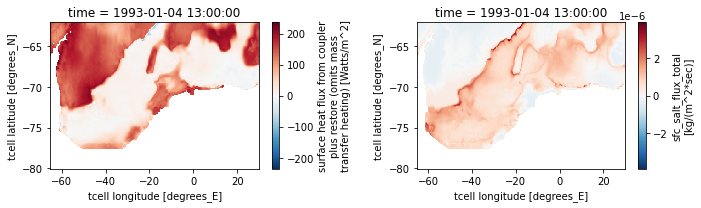

In [85]:
fix, (ax0,ax1) = plt.subplots(1,2, figsize=(10,3))
ocean_wg.hflux_total[0].plot(ax=ax0)
ocean_wg.salt_flux_total[0].plot(ax=ax1)
plt.tight_layout();

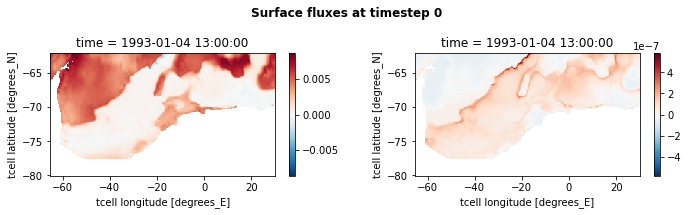

In [86]:
fix, (ax0,ax1) = plt.subplots(1,2, figsize=(10,3))
(surf_flux_th[0]/1e6).plot(cmap='RdBu_r', ax=ax0)
(surf_flux_slt[0]/1e6).plot(cmap='RdBu_r', ax=ax1)
plt.suptitle('Surface fluxes at timestep 0', fontweight='bold')
plt.tight_layout();

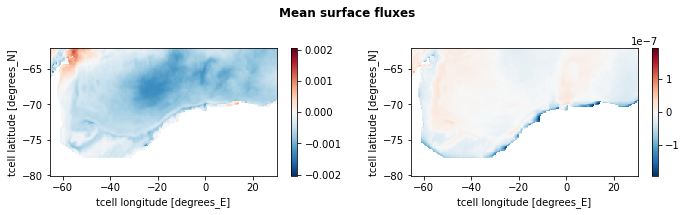

In [87]:
fix, (ax0,ax1) = plt.subplots(1,2, figsize=(10,3))
(surf_flux_th/1e6).mean(dim='time').plot(cmap='RdBu_r', ax=ax0)
(surf_flux_slt/1e6).mean(dim='time').plot(cmap='RdBu_r', ax=ax1)
plt.suptitle('Mean surface fluxes', fontweight='bold')
plt.tight_layout();

In [88]:
ocean_wg.temp

<xarray.DataArray 'temp' (time: 1970, st_ocean: 50, yt_ocean: 169, xt_ocean: 381)>
dask.array<getitem, shape=(1970, 50, 169, 381), dtype=float32, chunksize=(1, 50, 169, 381), chunktype=numpy.ndarray>
Coordinates:
  * st_ocean  (st_ocean) float64 5.034 15.1 25.22 ... 5.185e+03 5.395e+03
  * time      (time) object 1993-01-04 13:00:00 ... 2019-12-19 13:00:00
  * xt_ocean  (xt_ocean) float64 -65.12 -64.88 -64.62 ... 29.38 29.62 29.88
  * yt_ocean  (yt_ocean) float64 -80.02 -79.92 -79.81 ... -62.37 -62.25 -62.14
Attributes:
    cell_methods:   time: mean
    coordinates:    geolon_t geolat_t
    long_name:      Potential temperature
    standard_name:  sea_water_potential_temperature
    time_avg_info:  average_T1,average_T2,average_DT
    units:          degrees C
    valid_range:    [-10.0, 500.0]

In [89]:
def surface_to_3d(da):
    da = da.copy()
    da.coords['st_ocean'] = ocean_wg.st_ocean[0]
    da = da.expand_dims(dim='st_ocean', axis=1)
    da, _ = xr.align(da, ocean_wg.st_ocean, join='right')
    return da.fillna(0.)

In [90]:
surf_flux_th

<xarray.DataArray (time: 1970, yt_ocean: 169, xt_ocean: 381)>
dask.array<truediv, shape=(1970, 169, 381), dtype=float64, chunksize=(1, 169, 381), chunktype=numpy.ndarray>
Coordinates:
  * yt_ocean  (yt_ocean) float64 -80.02 -79.92 -79.81 ... -62.37 -62.25 -62.14
  * time      (time) object 1993-01-04 13:00:00 ... 2019-12-19 13:00:00
  * xt_ocean  (xt_ocean) float64 -65.12 -64.88 -64.62 ... 29.38 29.62 29.88

In [91]:
surf_flux_conv_TH = surface_to_3d(surf_flux_th)
surf_flux_conv_SLT = surface_to_3d(surf_flux_slt)

/srv/conda/envs/notebook/lib/python3.8/site-packages/xarray/core/indexing.py:1369: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/srv/conda/envs/notebook/lib/python3.8/site-packages/xarray/core/indexing.py:1369: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


## SW flux penetration

In [92]:
ocean_wg.swflx

<xarray.DataArray 'swflx' (time: 1970, yt_ocean: 169, xt_ocean: 381)>
dask.array<getitem, shape=(1970, 169, 381), dtype=float32, chunksize=(1, 169, 381), chunktype=numpy.ndarray>
Coordinates:
  * time      (time) object 1993-01-04 13:00:00 ... 2019-12-19 13:00:00
  * xt_ocean  (xt_ocean) float64 -65.12 -64.88 -64.62 ... 29.38 29.62 29.88
  * yt_ocean  (yt_ocean) float64 -80.02 -79.92 -79.81 ... -62.37 -62.25 -62.14
Attributes:
    cell_methods:   time: mean
    coordinates:    geolon_t geolat_t
    long_name:      shortwave flux into ocean (>0 heats ocean)
    standard_name:  surface_net_downward_shortwave_flux
    time_avg_info:  average_T1,average_T2,average_DT
    units:          W/m^2
    valid_range:    [-10000000000.0, 10000000000.0]

In [93]:
#sw flux
sw_flux = (ocean_wg.swflx * dx_interp * dy_u) / (heat_capacity_cp * runit2mass) #˚C*m^3/s

### ^ Need to figure out how to treat swflx penetrating through cell levels
__(PG 252 in MOM5 manual)__

## <font color='Green'>\begin{equation*} Total\ Tendency \end{equation*}</font>

In [61]:
#creating new time dim-coord by dropping 1980-01-01 13:00:00 from indices 1896 & 1897
#time is also missing 14th and 19th day for 2018 and 2019
ocean_wg.coords['time_no1980'] = ocean_wg.time.where(ocean_wg.time != ocean_wg.time.isel(time=1896), drop=True)
ocean_wg['time_no1980'] = ocean_wg.time.where(ocean_wg.time != ocean_wg.time.isel(time=1896), drop=True).values

In [94]:
ocean_wg.time.where(ocean_wg.time != ocean_wg.time.isel(time=1896), drop=True)

<xarray.DataArray 'time' (time: 1968)>
array([cftime.DatetimeJulian(1993, 1, 4, 13, 0, 0, 0),
       cftime.DatetimeJulian(1993, 1, 9, 13, 0, 0, 0),
       cftime.DatetimeJulian(1993, 1, 14, 13, 0, 0, 0), ...,
       cftime.DatetimeJulian(2019, 12, 9, 13, 0, 0, 0),
       cftime.DatetimeJulian(2019, 12, 14, 13, 0, 0, 0),
       cftime.DatetimeJulian(2019, 12, 19, 13, 0, 0, 0)], dtype=object)
Coordinates:
  * time     (time) object 1993-01-04 13:00:00 ... 2019-12-19 13:00:00
Attributes:
    bounds:          time_bounds
    calendar_type:   JULIAN
    cartesian_axis:  T
    long_name:       time

In [97]:
xr.decode_cf(ocean_wg.isel(time=1896)[['time']]).time

<xarray.DataArray 'time' ()>
array(cftime.DatetimeJulian(1980, 1, 1, 13, 0, 0, 0), dtype=object)
Coordinates:
    time     object ...
Attributes:
    bounds:          time_bounds
    calendar_type:   JULIAN
    cartesian_axis:  T
    long_name:       time

In [98]:
ocean_wg.time

<xarray.DataArray 'time' (time: 1970)>
array([cftime.DatetimeJulian(1993, 1, 4, 13, 0, 0, 0),
       cftime.DatetimeJulian(1993, 1, 9, 13, 0, 0, 0),
       cftime.DatetimeJulian(1993, 1, 14, 13, 0, 0, 0), ...,
       cftime.DatetimeJulian(2019, 12, 9, 13, 0, 0, 0),
       cftime.DatetimeJulian(2019, 12, 14, 13, 0, 0, 0),
       cftime.DatetimeJulian(2019, 12, 19, 13, 0, 0, 0)], dtype=object)
Coordinates:
  * time     (time) object 1993-01-04 13:00:00 ... 2019-12-19 13:00:00
Attributes:
    bounds:          time_bounds
    calendar_type:   JULIAN
    cartesian_axis:  T
    long_name:       time

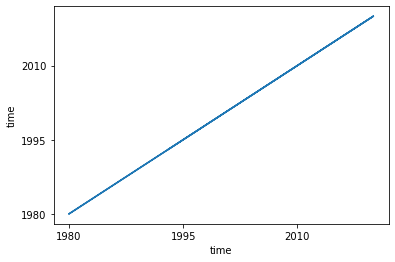

In [97]:
ocean_wg.time.plot()

In [104]:
ocean_wg.time.sel(time='2019')

<xarray.DataArray 'time' (time: 71)>
array([cftime.DatetimeJulian(2019, 1, 3, 13, 0, 0, 0),
       cftime.DatetimeJulian(2019, 1, 8, 13, 0, 0, 0),
       cftime.DatetimeJulian(2019, 1, 13, 13, 0, 0, 0),
       cftime.DatetimeJulian(2019, 1, 18, 13, 0, 0, 0),
       cftime.DatetimeJulian(2019, 1, 23, 13, 0, 0, 0),
       cftime.DatetimeJulian(2019, 1, 28, 13, 0, 0, 0),
       cftime.DatetimeJulian(2019, 2, 2, 13, 0, 0, 0),
       cftime.DatetimeJulian(2019, 2, 7, 13, 0, 0, 0),
       cftime.DatetimeJulian(2019, 2, 12, 13, 0, 0, 0),
       cftime.DatetimeJulian(2019, 2, 17, 13, 0, 0, 0),
       cftime.DatetimeJulian(2019, 2, 22, 13, 0, 0, 0),
       cftime.DatetimeJulian(2019, 2, 27, 13, 0, 0, 0),
       cftime.DatetimeJulian(2019, 3, 4, 13, 0, 0, 0),
       cftime.DatetimeJulian(2019, 3, 9, 13, 0, 0, 0),
       cftime.DatetimeJulian(2019, 3, 14, 13, 0, 0, 0),
       cftime.DatetimeJulian(2019, 3, 19, 13, 0, 0, 0),
       cftime.DatetimeJulian(2019, 3, 24, 13, 0, 0, 0),
       cftime.DatetimeJulian(2019, 3, 29, 13, 0, 0, 0),
       cftime.DatetimeJulian(2019, 4, 3, 13, 0, 0, 0),
       cftime.DatetimeJulian(2019, 4, 8, 13, 0, 0, 0),
       cftime.DatetimeJulian(2019, 4, 13, 13, 0, 0, 0),
       cftime.DatetimeJulian(2019, 4, 18, 13, 0, 0, 0),
       cftime.DatetimeJulian(2019, 4, 23, 13, 0, 0, 0),
       cftime.DatetimeJulian(2019, 4, 28, 13, 0, 0, 0),
       cftime.DatetimeJulian(2019, 5, 3, 13, 0, 0, 0),
       cftime.DatetimeJulian(2019, 5, 8, 13, 0, 0, 0),
       cftime.DatetimeJulian(2019, 5, 13, 13, 0, 0, 0),
       cftime.DatetimeJulian(2019, 5, 18, 13, 0, 0, 0),
       cftime.DatetimeJulian(2019, 5, 23, 13, 0, 0, 0),
       cftime.DatetimeJulian(2019, 5, 28, 13, 0, 0, 0),
       cftime.DatetimeJulian(2019, 6, 2, 13, 0, 0, 0),
       cftime.DatetimeJulian(2019, 6, 7, 13, 0, 0, 0),
       cftime.DatetimeJulian(2019, 6, 12, 13, 0, 0, 0),
       cftime.DatetimeJulian(2019, 6, 17, 13, 0, 0, 0),
       cftime.DatetimeJulian(2019, 6, 22, 13, 0, 0, 0),
       cftime.DatetimeJulian(2019, 6, 27, 13, 0, 0, 0),
       cftime.DatetimeJulian(2019, 7, 2, 13, 0, 0, 0),
       cftime.DatetimeJulian(2019, 7, 7, 13, 0, 0, 0),
       cftime.DatetimeJulian(2019, 7, 12, 13, 0, 0, 0),
       cftime.DatetimeJulian(2019, 7, 17, 13, 0, 0, 0),
       cftime.DatetimeJulian(2019, 7, 22, 13, 0, 0, 0),
       cftime.DatetimeJulian(2019, 7, 27, 13, 0, 0, 0),
       cftime.DatetimeJulian(2019, 8, 1, 13, 0, 0, 0),
       cftime.DatetimeJulian(2019, 8, 6, 13, 0, 0, 0),
       cftime.DatetimeJulian(2019, 8, 11, 13, 0, 0, 0),
       cftime.DatetimeJulian(2019, 8, 16, 13, 0, 0, 0),
       cftime.DatetimeJulian(2019, 8, 21, 13, 0, 0, 0),
       cftime.DatetimeJulian(2019, 8, 26, 13, 0, 0, 0),
       cftime.DatetimeJulian(2019, 8, 31, 13, 0, 0, 0),
       cftime.DatetimeJulian(2019, 9, 5, 13, 0, 0, 0),
       cftime.DatetimeJulian(2019, 9, 10, 13, 0, 0, 0),
       cftime.DatetimeJulian(2019, 9, 15, 13, 0, 0, 0),
       cftime.DatetimeJulian(2019, 9, 20, 13, 0, 0, 0),
       cftime.DatetimeJulian(2019, 9, 25, 13, 0, 0, 0),
       cftime.DatetimeJulian(2019, 9, 30, 13, 0, 0, 0),
       cftime.DatetimeJulian(2019, 10, 5, 13, 0, 0, 0),
       cftime.DatetimeJulian(2019, 10, 10, 13, 0, 0, 0),
       cftime.DatetimeJulian(2019, 10, 15, 13, 0, 0, 0),
       cftime.DatetimeJulian(2019, 10, 20, 13, 0, 0, 0),
       cftime.DatetimeJulian(2019, 10, 25, 13, 0, 0, 0),
       cftime.DatetimeJulian(2019, 10, 30, 13, 0, 0, 0),
       cftime.DatetimeJulian(2019, 11, 4, 13, 0, 0, 0),
       cftime.DatetimeJulian(2019, 11, 9, 13, 0, 0, 0),
       cftime.DatetimeJulian(2019, 11, 14, 13, 0, 0, 0),
       cftime.DatetimeJulian(2019, 11, 19, 13, 0, 0, 0),
       cftime.DatetimeJulian(2019, 11, 24, 13, 0, 0, 0),
       cftime.DatetimeJulian(2019, 11, 29, 13, 0, 0, 0),
       cftime.DatetimeJulian(2019, 12, 4, 13, 0, 0, 0),
       cftime.DatetimeJulian(2019, 12, 9, 13, 0, 0, 0),
       cftime.DatetimeJulian(2019, 12, 14, 13, 0, 0, 0),
       cftime.DatetimeJulian(2019, 12, 19, 13, 0, 

In [101]:
ocean_wg.time.sel(time=slice('1993', '2019'), method='nearest')

NotImplementedError: cannot use ``method`` argument if any indexers are slice objects

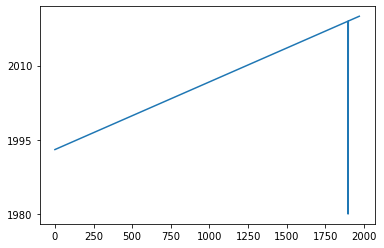

In [98]:
plt.plot(ocean_wg.time.values)

In [62]:
ocean_wg.time_no1980

<xarray.DataArray 'time_no1980' (time_no1980: 1968)>
array([cftime.DatetimeJulian(1993, 1, 4, 13, 0, 0, 0),
       cftime.DatetimeJulian(1993, 1, 9, 13, 0, 0, 0),
       cftime.DatetimeJulian(1993, 1, 14, 13, 0, 0, 0), ...,
       cftime.DatetimeJulian(2019, 12, 9, 13, 0, 0, 0),
       cftime.DatetimeJulian(2019, 12, 14, 13, 0, 0, 0),
       cftime.DatetimeJulian(2019, 12, 19, 13, 0, 0, 0)], dtype=object)
Coordinates:
  * time_no1980  (time_no1980) object 1993-01-04 13:00:00 ... 2019-12-19 13:0...

In [63]:
dt_values = (ocean_wg.time_no1980.diff('time_no1980') / 1e9).astype('f4')
dt = xr.DataArray(dt_values, dims=['time_no1980'], 
                  coords={'time_no1980': (['time_no1980'], ocean_wg.time_no1980.values[1:])}) #shaves off first time stamp in `ocean_wg.time_no1980`
ocean_wg.coords['dt'] = dt

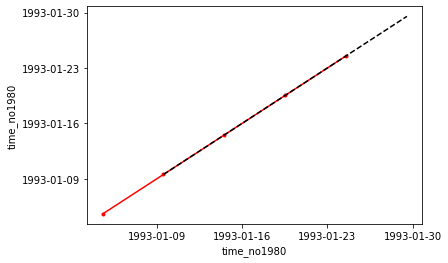

In [64]:
ocean_wg.time_no1980[0:5].plot(color='r', marker='.')
dt_values.time_no1980[0:5].plot(color='k', linestyle='dashed')

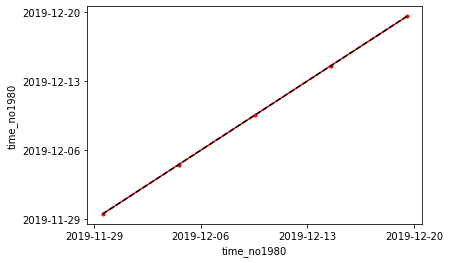

In [65]:
ocean_wg.time_no1980[-5:].plot(color='r', marker='.')
dt_values.time_no1980[-5:].plot(color='k', linestyle='dashed')

**Theta Tendency Term**

In [66]:
ocean_wg.temp

<xarray.DataArray 'temp' (time: 1970, st_ocean: 50, yt_ocean: 169, xt_ocean: 381)>
dask.array<getitem, shape=(1970, 50, 169, 381), dtype=float32, chunksize=(1, 50, 169, 381), chunktype=numpy.ndarray>
Coordinates:
  * st_ocean  (st_ocean) float64 5.034 15.1 25.22 ... 5.185e+03 5.395e+03
  * time      (time) object 1993-01-04 13:00:00 ... 2019-12-19 13:00:00
  * xt_ocean  (xt_ocean) float64 -65.12 -64.88 -64.62 ... 29.38 29.62 29.88
  * yt_ocean  (yt_ocean) float64 -80.02 -79.92 -79.81 ... -62.37 -62.25 -62.14
Attributes:
    cell_methods:   time: mean
    coordinates:    geolon_t geolat_t
    long_name:      Potential temperature
    standard_name:  sea_water_potential_temperature
    time_avg_info:  average_T1,average_T2,average_DT
    units:          degrees C
    valid_range:    [-10.0, 500.0]

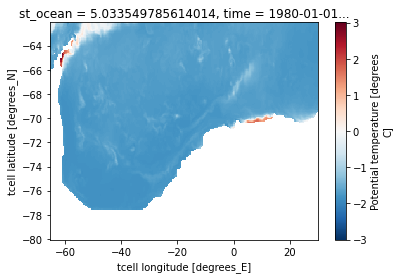

In [67]:
ocean_wg.temp[1896][0].plot()

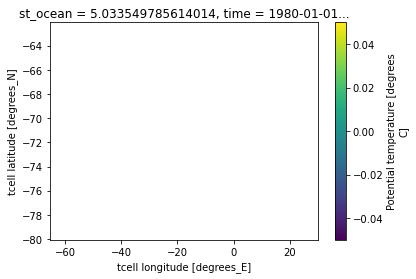

In [68]:
ocean_wg.temp[1897][0].plot()

In [69]:
ocean_wg.time[1896]

<xarray.DataArray 'time' ()>
array(cftime.DatetimeJulian(1980, 1, 1, 13, 0, 0, 0), dtype=object)
Coordinates:
    time     object 1980-01-01 13:00:00
Attributes:
    bounds:          time_bounds
    calendar_type:   JULIAN
    cartesian_axis:  T
    long_name:       time

In [70]:
ocean_wg.temp.time

<xarray.DataArray 'time' (time: 1970)>
array([cftime.DatetimeJulian(1993, 1, 4, 13, 0, 0, 0),
       cftime.DatetimeJulian(1993, 1, 9, 13, 0, 0, 0),
       cftime.DatetimeJulian(1993, 1, 14, 13, 0, 0, 0), ...,
       cftime.DatetimeJulian(2019, 12, 9, 13, 0, 0, 0),
       cftime.DatetimeJulian(2019, 12, 14, 13, 0, 0, 0),
       cftime.DatetimeJulian(2019, 12, 19, 13, 0, 0, 0)], dtype=object)
Coordinates:
  * time     (time) object 1993-01-04 13:00:00 ... 2019-12-19 13:00:00
Attributes:
    bounds:          time_bounds
    calendar_type:   JULIAN
    cartesian_axis:  T
    long_name:       time

In [71]:
#create new temp var w/ no 1980
temp = ocean_wg.temp.where(ocean_wg.temp.time != ocean_wg.time.isel(time=1896), drop=True)

In [81]:
client

Client Scheduler: gateway://traefik-gcp-uscentral1b-prod-dask-gateway.prod:80/prod.8cca91a863d14ae396bfd2c90792a8eb Dashboard: /services/dask-gateway/clusters/prod.8cca91a863d14ae396bfd2c90792a8eb/status,Cluster Workers: 18 Cores: 36 Memory: 154.62 GB


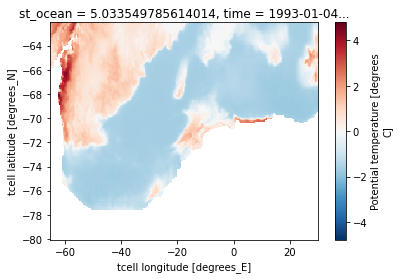

In [82]:
temp[0,0].plot()

In [83]:
delta_theta = temp.diff('time')#.load()

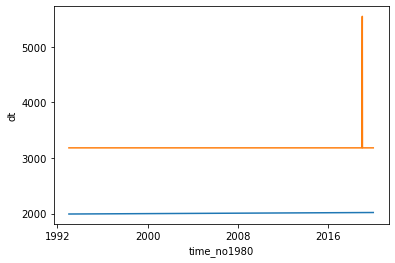

In [84]:
delta_theta.time.plot()
ocean_wg.dt[1:].plot()

In [85]:
ocean_wg.dt[1:]

<xarray.DataArray 'dt' (time_no1980: 1967)>
array([432000., 432000., 432000., ..., 432000., 432000., 432000.],
      dtype=float32)
Coordinates:
  * time_no1980  (time_no1980) object 1993-01-09 13:00:00 ... 2019-12-19 13:0...
    dt           (time_no1980) float32 4.32e+05 4.32e+05 ... 4.32e+05 4.32e+05

In [86]:
ocean_wg.dt.time_no1980[1:]

<xarray.DataArray 'time_no1980' (time_no1980: 1967)>
array([cftime.DatetimeJulian(1993, 1, 9, 13, 0, 0, 0),
       cftime.DatetimeJulian(1993, 1, 14, 13, 0, 0, 0),
       cftime.DatetimeJulian(1993, 1, 19, 13, 0, 0, 0), ...,
       cftime.DatetimeJulian(2019, 12, 9, 13, 0, 0, 0),
       cftime.DatetimeJulian(2019, 12, 14, 13, 0, 0, 0),
       cftime.DatetimeJulian(2019, 12, 19, 13, 0, 0, 0)], dtype=object)
Coordinates:
  * time_no1980  (time_no1980) object 1993-01-09 13:00:00 ... 2019-12-19 13:0...
    dt           (time_no1980) float32 4.32e+05 4.32e+05 ... 4.32e+05 4.32e+05

In [87]:
delta_theta

<xarray.DataArray 'temp' (time: 1967, st_ocean: 50, yt_ocean: 169, xt_ocean: 381)>
dask.array<sub, shape=(1967, 50, 169, 381), dtype=float32, chunksize=(1, 50, 169, 381), chunktype=numpy.ndarray>
Coordinates:
  * st_ocean  (st_ocean) float64 5.034 15.1 25.22 ... 5.185e+03 5.395e+03
  * time      (time) object 1993-01-09 13:00:00 ... 2019-12-19 13:00:00
  * xt_ocean  (xt_ocean) float64 -65.12 -64.88 -64.62 ... 29.38 29.62 29.88
  * yt_ocean  (yt_ocean) float64 -80.02 -79.92 -79.81 ... -62.37 -62.25 -62.14

In [88]:
theta_tend = (delta_theta / ocean_wg.dt[1:])#.load()

In [91]:
theta_tend

<xarray.DataArray (time: 1967, st_ocean: 50, yt_ocean: 169, xt_ocean: 381, time_no1980: 1967)>
dask.array<truediv, shape=(1967, 50, 169, 381, 1967), dtype=float32, chunksize=(1, 50, 169, 381, 1967), chunktype=numpy.ndarray>
Coordinates:
  * st_ocean     (st_ocean) float64 5.034 15.1 25.22 ... 5.185e+03 5.395e+03
  * time         (time) object 1993-01-09 13:00:00 ... 2019-12-19 13:00:00
  * xt_ocean     (xt_ocean) float64 -65.12 -64.88 -64.62 ... 29.38 29.62 29.88
  * yt_ocean     (yt_ocean) float64 -80.02 -79.92 -79.81 ... -62.25 -62.14
  * time_no1980  (time_no1980) object 1993-01-09 13:00:00 ... 2019-12-19 13:0...
    dt           (time_no1980) float32 4.32e+05 4.32e+05 ... 4.32e+05 4.32e+05

In [96]:
ocean_wg.swflx

<xarray.DataArray 'swflx' (time: 1970, yt_ocean: 169, xt_ocean: 381)>
dask.array<getitem, shape=(1970, 169, 381), dtype=float32, chunksize=(1, 169, 381), chunktype=numpy.ndarray>
Coordinates:
  * time      (time) object 1993-01-04 13:00:00 ... 2019-12-19 13:00:00
  * xt_ocean  (xt_ocean) float64 -65.12 -64.88 -64.62 ... 29.38 29.62 29.88
  * yt_ocean  (yt_ocean) float64 -80.02 -79.92 -79.81 ... -62.37 -62.25 -62.14
Attributes:
    cell_methods:   time: mean
    coordinates:    geolon_t geolat_t
    long_name:      shortwave flux into ocean (>0 heats ocean)
    standard_name:  surface_net_downward_shortwave_flux
    time_avg_info:  average_T1,average_T2,average_DT
    units:          W/m^2
    valid_range:    [-10000000000.0, 10000000000.0]

In [92]:
theta_tend[0,0].plot()

KeyboardInterrupt: 

In [ ]:
client

In [ ]:
theta_tend.coords#[:,1:,1:,1:]

In [ ]:
dx_u_wg_interp.coords

In [ ]:
dy_u_wg.coords

In [ ]:
dz.coords

In [ ]:
totttend = theta_tend * dx_u_wg_interp * dy_u_wg * dz

In [ ]:
(totttend[0,0]/1e6).plot()

**Salt Tendency Term**

In [ ]:
delta_salt = salt.diff('time')

In [ ]:
#forcing delta_salt to have same timestamp as ds.dt by creating new data array called "salt_scaled"
delta_salt = xr.DataArray(delta_salt.data, dims=['time','level','lat','lon'], 
                            coords={'time': coords_wg.dt[0:-1].time.data,
                                    'level': coords_wg.level,
                                    'lat': coords_wg.lat,
                                    'lon': coords_wg.lon})
delta_salt

In [ ]:
salt_tend = (delta_salt / coords.dt[0:-1])

In [ ]:
salt_tend[0,0].plot()

In [ ]:
salt_tend.coords

In [ ]:
totstend = salt_tend * dx_u_wg_interp * dy_u_wg * dz

In [ ]:
fix, (ax0,ax1) = plt.subplots(1,2, figsize=(10,3))
(totttend[0,0]/1e6).plot(cmap='RdBu_r', ax=ax0)
(totstend[0,0]/1e6).plot(cmap='RdBu_r', ax=ax1)
plt.tight_layout();

In [ ]:
fix, (ax0,ax1) = plt.subplots(1,2, figsize=(10,3))
(totttend.isel(time=slice(0,-1), level=0)/1e6).mean(dim='time').plot(cmap='RdBu_r', ax=ax0)
(totstend.isel(time=slice(0,-1), level=0)/1e6).mean(dim='time').plot(cmap='RdBu_r', ax=ax1)
plt.tight_layout();

In [ ]:
((temp[-3,0, 1:, 1:] - temp[0,0, 1:, 1:])/1e6).plot(cmap='RdBu_r', vmax=0)#, vmin=-6e-5)

In [ ]:
(temp[-3, 0] - temp[0, 0]).plot()